<a href="https://colab.research.google.com/github/caroolpmelo/facial-keypoints-detection-pipeline/blob/main/cmpm_challenge_data_science_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connect with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/"Colab Notebooks"/"[ML] Pós 2023.2"/"Desafio 07 - Pipeline Ciência de Dados"

!ls

/content/gdrive/MyDrive/Colab Notebooks/[ML] Pós 2023.2/Desafio 07 - Pipeline Ciência de Dados
cmpm-desafio_07-data_science_pipeline.ipynb  facial-keypoints-detection.zip


#Kaggle API Setup and Downloading Data

In [ ]:
# Step 1: Uploading the kaggle json file
from google.colab import files
files.upload()

# Step 2: Create a kaggle directory and store Kaggle.json file inside it
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory


Downloading Data

In [ ]:
# Step 3: Download Dataset
!kaggle competitions download -c facial-keypoints-detection

facial-keypoints-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls # checking downloaded data

cmpm-desafio_07-data_science_pipeline.ipynb  facial-keypoints-detection.zip


Unzipping Dataset File

In [ ]:
# Step 4: File downloaded in step 3 is a Zip file, needs to unzip it
import zipfile
zip_ref = zipfile.ZipFile('facial-keypoints-detection.zip', 'r') # name of Zip file
zip_ref.extractall('/content/data') # name of File Path to save extraction
zip_ref.close()

Unzipping Test and Training Data (built-in in previous zip file)

In [ ]:
%cd /content/data
!ls

/content/data
IdLookupTable.csv  SampleSubmission.csv  test.zip  training.zip


In [ ]:
zip_ref = zipfile.ZipFile('test.zip', 'r') # name of Zip file
zip_ref.extractall('/content/data') # name of File Path to save extraction
zip_ref = zipfile.ZipFile('training.zip', 'r') # name of Zip file
zip_ref.extractall('/content/data') # name of File Path to save extraction
zip_ref.close()

#[Facial Keypoints Detection](https://www.kaggle.com/competitions/facial-keypoints-detection) Dataset

The objective of this task is to predict keypoint positions on face images. This... TODO

Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Left and right here refers to the point of view of the subject.

In some examples, some of the target keypoint positions are misssing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

###Importing the packages to work with the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loading train and valid data frames from csv
train_df = pd.read_csv("/content/data/training.csv")
valid_df = pd.read_csv("/content/data/test.csv")

###Exploring the Data

In [ ]:
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Here we can check that each line of this dataset represents one image, and the colums represent the x and y coordinates from each one of the 15 keypoints. The last colum represent the pixels correspondent to the image. Later on this notebook we will transform this one dimensional pixels in 96x96 images for better visualization.

Statistic about features:

In [ ]:
train_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
valid_df.head() # checking how the validation data is expected to be

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


###Data Preprocessing

Checking for null values:

In [ ]:
train_df.isnull()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7045,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7046,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7047,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False


We confirmed that some values are null. Let's check it in numbers:

In [ ]:
train_df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

We noticed that maybe the missing values are much more than expected 🤔

For better understanding, let's create a new dataframe seeing the percentage of null values for each column.

In [ ]:
train_df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [ ]:
features=train_df.columns[:-1] # removing last column "Image", just to keep keypoints
features

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
df=train_df[features] # new dataframe just to remove image column

null_data_df=pd.DataFrame(df.isnull().sum(),columns=['null_count']) # creates column null_count with null info
null_data_df['total_values']=[len(df)]*len(null_data_df) # check total values count to use to calculate percentage
null_data_df['null_percentage']=null_data_df['null_count']/null_data_df['total_values']
null_data_df['null_percentage']=null_data_df['null_percentage']*100 # so values can be read as %

null_data_df

,null_count,total_values,null_percentage
left_eye_center_x,10,7049,0.141864
left_eye_center_y,10,7049,0.141864
right_eye_center_x,13,7049,0.184423
right_eye_center_y,13,7049,0.184423
left_eye_inner_corner_x,4778,7049,67.782664
left_eye_inner_corner_y,4778,7049,67.782664
left_eye_outer_corner_x,4782,7049,67.839410
left_eye_outer_corner_y,4782,7049,67.839410
right_eye_inner_corner_x,4781,7049,67.825223
right_eye_inner_corner_y,4781,7049,67.825223


###Approach to working with null values

This way it is possible to confirm that in some columns we have up to **68% of missing values**. These missing values are large, so deleting them will greatly reduce the data and affect the predictions. Replacing the values with the mean would not guarantee that the new values would be accurate with the image presented, so one approach would be to **replace the missing values with the previous value** in the correspondent row. This may lead to one specific misaligment in that row but I belive that would work better than replacing with the mean.

In [ ]:
train_df.fillna(method = 'ffill', inplace=True) # fill missing values using ffill

In [ ]:
train_df.isnull().sum().any() # checking missing values again

False

No more missing values :)

###Analysing and visualizing image column

Now that we have dealt with the missing values, we are going to work on how to make the image vector look more alike the 96x96 pixels image it is supposed to be.

In [ ]:
type(train_df['Image'][0])

str

The Image column is a string, and they are split by a space. So we can cast it to int (since the values are numbers) and use the space to separate them. For simplification, we can use the [Numpy's Stack function](https://numpy.org/doc/stable/reference/generated/numpy.stack.html). In this fucntion, the axis parameter specifies the index of the new axis in the dimensions of the result. For example, if axis=0 it will be the first dimension and if axis=-1 it will be the last dimension. Since we are working with rows that goes from 0 to 255, we could divide the reshape of the data by it, concerting the string of pixels into a numpy 96x96 array. We will create a method for this operation, since we can use it later for the test data:

In [ ]:
def img_from_arr(df):
    imgs=df['Image'].apply(lambda image: np.array(image.split(' '),dtype='int'))
    imgs=np.stack(imgs,axis=0).reshape(-1,96,96)/255.0
    return imgs

In [ ]:
# separating features and targets
x_train = img_from_arr(train_df)
y_train = train_df[features]

In [ ]:
x_train.shape

(7049, 96, 96)

In [ ]:
y_train.shape

(7049, 30)

Now we can try to see one image from the train data:

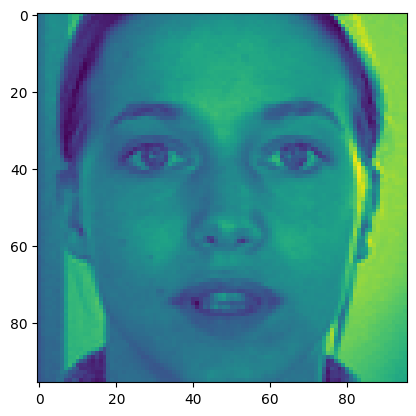

In [ ]:
plt.imshow(x_train[12]) #random index
plt.show()

Now we need to see the images with the respective facial keypoints. Making the images to be o gray scale facilitates visualization. We will make a grid of random images to produces the keypoints for each of them, using [MatPlotLib's scatter function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

In [ ]:
def display_keypoints_grid(x_train,y_train):
    """
    Function that generates the grid of random images where number of rows and
    columns needs to be supplied as arguments to the function.
    """
    rows = 4
    columns = 4 # produces a 4x4 image grid, 16 imgs in total

    #plt.figure(figsize=(10,10))
    for i in range(rows*columns):
        img_random_index=np.random.choice(len(x_train))
        plt.subplot(rows,columns,i+1) #making the tiny plot for each one
        plt.imshow(x_train[img_random_index], cmap='gray') # show in scale of gray
        plt.scatter(y_train[img_random_index,:,0],y_train[img_random_index,:,1],marker='o',color='green')
    plt.show()

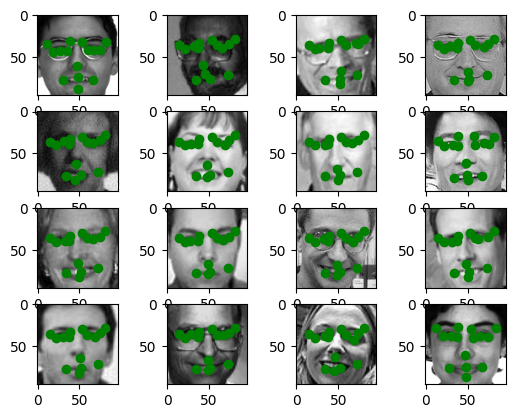

In [ ]:
# reshape so they have similar shapes, since y_train is (7049, 30) and x_train (7049, 96, 96)
# 15 is for the keypoints and 2 for the pair x, y
y_train_reshaped=y_train.values.reshape(y_train.shape[0],15,2)
display_keypoints_grid(x_train, y_train_reshaped)

Now we can start building the model :)

###Building the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)


model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(96, 96, 1),
                activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(30))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 96, 96, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       147584    
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                        

###Training the Model

Since the evaluation of the model uses the root mean squared error, we will use it in loss:

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# running with 200 epochs
# 20% for validation
history = model.fit(x_train, y_train, epochs=200, batch_size=32,
                    validation_split=0.2) # saving in varible to plot latter

Epoch 1/200
177/177 [==============================] - 7s 37ms/step - loss: 9.6448 - accuracy: 0.7987 - val_loss: 3.1801 - val_accuracy: 0.7397
Epoch 2/200
177/177 [==============================] - 6s 35ms/step - loss: 9.5315 - accuracy: 0.8078 - val_loss: 2.8714 - val_accuracy: 0.7752
Epoch 3/200
177/177 [==============================] - 6s 36ms/step - loss: 9.5613 - accuracy: 0.8067 - val_loss: 2.6183 - val_accuracy: 0.7560
Epoch 4/200
177/177 [==============================] - 7s 37ms/step - loss: 9.3818 - accuracy: 0.8065 - val_loss: 2.6823 - val_accuracy: 0.7780
Epoch 5/200
177/177 [==============================] - 6s 36ms/step - loss: 9.4356 - accuracy: 0.8067 - val_loss: 4.7211 - val_accuracy: 0.7809
Epoch 6/200
177/177 [==============================] - 6s 36ms/step - loss: 9.2577 - accuracy: 0.8124 - val_loss: 3.6804 - val_accuracy: 0.7482
Epoch 7/200
177/177 [==============================] - 6s 34ms/step - loss: 9.4428 - accuracy: 0.8042 - val_loss: 2.9312 - val_accuracy:

###Model Performance

Plotting the loss and accuracy for the training and validation data:

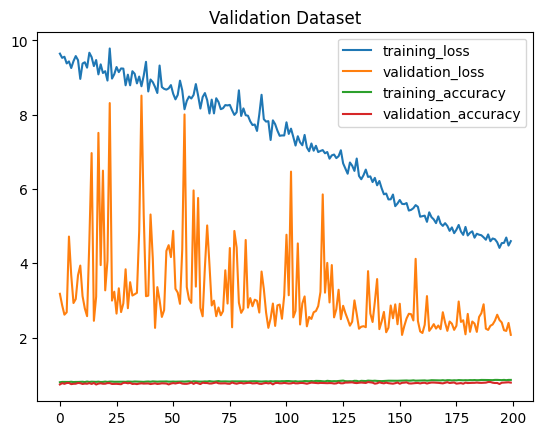

In [ ]:
plt.title('Training Dataset')
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()

plt.title('Validation Dataset')
plt.plot(history.history['accuracy'],label='training_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()

plt.show()

Validating Model with Test Data

In [ ]:
x_test = img_from_arr(valid_df)
prediction = model.predict(x_test)
print(prediction)

56/56 [==============================] - 1s 12ms/step
[[67.258255 37.837112 29.792994 ... 69.28691  47.616417 86.34479 ]
 [68.21412  36.15822  26.908194 ... 73.318115 48.597176 87.60926 ]
 [65.04503  35.84481  30.55324  ... 71.57416  49.643654 83.69989 ]
 ...
 [68.237335 41.572983 33.284554 ... 76.134796 47.831047 77.3949  ]
 [64.36443  37.05999  30.631437 ... 76.25436  46.576584 73.87387 ]
 [68.65895  39.482246 32.14421  ... 76.22114  47.76864  80.778915]]


Looking at the results of the test images in the model, through our image visualization method:

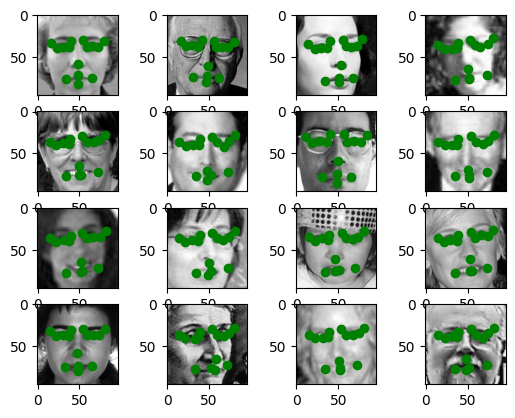

In [ ]:
x_test_reshaped=prediction.reshape(len(prediction),15,2)
display_keypoints_grid(x_test,x_test_reshaped)

<!-- This will be a baseline model. This model will be built and later on we will fine tune the model.
Also I am gonna build a CNN to compare the results. -->

#Dataset Results Summary

We have seen that this model presented can reach almost 80% of accurancy in its test data, with a performance somewhat good performance (above 75%). And this just reflects how complex face recognition can be, as pontuated by the dataset overview in Kaggle.
Maybe setting the missing values as the previous one could have impacted in the accurancy, so maybe the best accuracy would be checking the images and set the points manually. Maybe the accuracy percentage reflects this exact problem.
Another approach would be to only consider the non null value to the the complete dataset, meaning that instead of filling the null values, we could use ther other 32% of present values to be 100% of our dataset, probably reducing the loss and augmenting the accuracy.